In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np 
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras 
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D, Dense

In [4]:
from keras_preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/train",target_size=(224,224),batch_size=32)

Found 25331 images belonging to 7 classes.


In [7]:
val_generator = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/val",target_size=(224,224),batch_size=32)

Found 5844 images belonging to 7 classes.


In [8]:
for data_batch,label_batch in train_generator:
  print(data_batch.shape)
  print(label_batch.shape)
  break

(32, 224, 224, 3)
(32, 7)


In [9]:
model = Sequential()
width = 224
height = 224
classes = 7

In [10]:
shape = (width, height, 3)

In [11]:
model.add(Conv2D(16, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(258))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      1

In [13]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
 history = model .fit(train_generator,epochs=30, validation_data =val_generator,batch_size=32,verbose = 1) 

Epoch 1/30
792/792 [==============================] - 154s 171ms/step - loss: 1.4012 - accuracy: 0.4918 - val_loss: 1.0789 - val_accuracy: 0.5962
Epoch 2/30
792/792 [==============================] - 114s 144ms/step - loss: 1.0362 - accuracy: 0.6023 - val_loss: 0.9559 - val_accuracy: 0.6333
Epoch 3/30
792/792 [==============================] - 113s 143ms/step - loss: 0.8499 - accuracy: 0.6714 - val_loss: 0.8121 - val_accuracy: 0.6828
Epoch 4/30
792/792 [==============================] - 114s 144ms/step - loss: 0.6891 - accuracy: 0.7313 - val_loss: 0.7611 - val_accuracy: 0.7149
Epoch 5/30
792/792 [==============================] - 113s 143ms/step - loss: 0.5305 - accuracy: 0.7912 - val_loss: 0.7518 - val_accuracy: 0.7180
Epoch 6/30
792/792 [==============================] - 113s 143ms/step - loss: 0.3871 - accuracy: 0.8536 - val_loss: 0.7108 - val_accuracy: 0.7574
Epoch 7/30
792/792 [==============================] - 114s 143ms/step - loss: 0.2586 - accuracy: 0.9043 - val_loss: 0.8195 -

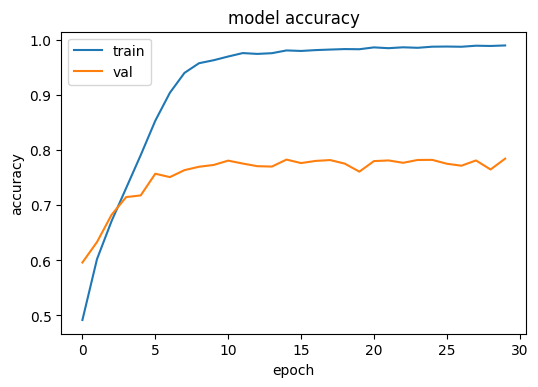

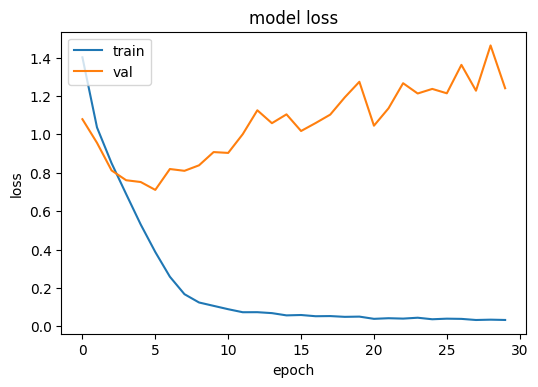

In [15]:
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
test_generator = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/test",target_size=(224,224),batch_size=7795,class_mode="sparse")

Found 7795 images belonging to 7 classes.


In [ ]:
for Xtest,Ytest in test_generator:
  X_test = Xtest
  Y_test = Ytest
  break

In [ ]:
pred = model.predict(Xtest)
pred_idx = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(Y_test, pred_idx))

In [ ]:
import pandas as pd
import seaborn as sns
cm = confusion_matrix(Y_test,pred_idx)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"], columns=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='.2%')
plt.show()